In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import regularizers,optimizers
from keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from keras.layers import Conv2D, MaxPooling2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array,array_to_img,save_img
from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle              # For saving models to disk and loading saved models
import os
import zipfile
import PIL
import PIL.Image
import pathlib
import cv2 as cv

In [2]:
# Initializing the random number generator
import random
random.seed(0)

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Mounting the google drive to load the data file
from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [7]:
path = '/content/drive/My Drive/capstone/'
os.chdir(path)


In [ ]:
car_img_path = os.path.join(path,'Car Images/')
car_ann_path = os.path.join(path,'Annotations/')

In [ ]:
ds_car_name = pd.read_csv("Car names and make.csv",names=['Car Name'])
ds_car_name

,Car Name
0,AM General Hummer SUV 2000
1,Acura RL Sedan 2012
2,Acura TL Sedan 2012
3,Acura TL Type-S 2008
4,Acura TSX Sedan 2012
...,...
191,Volkswagen Beetle Hatchback 2012
192,Volvo C30 Hatchback 2012
193,Volvo 240 Sedan 1993
194,Volvo XC90 SUV 2007


In [ ]:
count = 0
car_dict = {}
for car_name in ds_car_name['Car Name'].values:
    car_dict[count+1] = car_name
    count=count+1
car_dict


{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [ ]:
train_img_dir = os.path.join(car_img_path,'Train Images/')
test_img_dir =  os.path.join(car_img_path,'Test Images/')

In [ ]:
df_train = pd.read_csv("/content/drive/My Drive/capstone/train1.csv")
df_test = pd.read_csv("/content/drive/My Drive/capstone/test1.csv")

In [ ]:
resize_img = '/content/drive/My Drive/capstone/Car Images/train_img_resize/'
file_path = {}
count = 0
for filename in os.listdir(resize_img):
    file_path[filename] = os.path.join(resize_img,filename)
df_train['Resize_Image_Path'] = df_train['Image_Name'].apply(lambda x:file_path[x])
df_train['Resize_Image_Path']

0       /content/drive/My Drive/capstone/Car Images/tr...
1       /content/drive/My Drive/capstone/Car Images/tr...
2       /content/drive/My Drive/capstone/Car Images/tr...
3       /content/drive/My Drive/capstone/Car Images/tr...
4       /content/drive/My Drive/capstone/Car Images/tr...
                              ...                        
8139    /content/drive/My Drive/capstone/Car Images/tr...
8140    /content/drive/My Drive/capstone/Car Images/tr...
8141    /content/drive/My Drive/capstone/Car Images/tr...
8142    /content/drive/My Drive/capstone/Car Images/tr...
8143    /content/drive/My Drive/capstone/Car Images/tr...
Name: Resize_Image_Path, Length: 8144, dtype: object

In [ ]:
resize_img = '/content/drive/My Drive/capstone/Car Images/test_img_resize/'
file_path = {}
count = 0
for filename in os.listdir(resize_img):
    file_path[filename] = os.path.join(resize_img,filename)
df_test['Resize_Image_Path'] = df_test['Image_Name'].apply(lambda x:file_path[x])
df_test['Resize_Image_Path']

0       /content/drive/My Drive/capstone/Car Images/te...
1       /content/drive/My Drive/capstone/Car Images/te...
2       /content/drive/My Drive/capstone/Car Images/te...
3       /content/drive/My Drive/capstone/Car Images/te...
4       /content/drive/My Drive/capstone/Car Images/te...
                              ...                        
8036    /content/drive/My Drive/capstone/Car Images/te...
8037    /content/drive/My Drive/capstone/Car Images/te...
8038    /content/drive/My Drive/capstone/Car Images/te...
8039    /content/drive/My Drive/capstone/Car Images/te...
8040    /content/drive/My Drive/capstone/Car Images/te...
Name: Resize_Image_Path, Length: 8041, dtype: object

In [ ]:
df_train['Bbox'] = df_train.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
df_test['Bbox'] = df_test.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)

In [ ]:
def load_images_from_folder(folder):
    #file_name = []
    file_path = {}
    count = 0
    for folders in os.listdir(folder):
        #print(folders)
        if folders == '.DS_Store':
            pass
        else:
            foldername = os.path.join(folder,folders)
            #print(foldername)
            for filename in os.listdir(foldername):
                count = count+1
                filepath = os.path.join(foldername,filename)
                #file_name.append(filename)
                file_path[filename]=filepath
                #print(filename)
    return file_path


train_images_path = load_images_from_folder(train_img_dir)
test_images_path = load_images_from_folder(test_img_dir)

In [ ]:
df_train['Image_Path'] = df_train['Image_Name'].apply(lambda x:train_images_path[x])
df_test['Image_Path'] = df_test['Image_Name'].apply(lambda x:test_images_path[x])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.35)
test_datagen  = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(df_train,directory=None, x_col='Resize_Image_Path', y_col='Car_Name',subset="training",weight_col=None,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32,shuffle=True)
valid_generator = train_datagen.flow_from_dataframe(df_train,directory=None, x_col='Resize_Image_Path', y_col='Car_Name',subset="validation",weight_col=None,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_dataframe(df_test,directory=None, x_col='Resize_Image_Path', y_col=None,weight_col=None,target_size=(224,224),color_mode='rgb',class_mode=None,batch_size=32,shuffle=False)

Found 5294 validated image filenames belonging to 196 classes.
Found 2850 validated image filenames belonging to 196 classes.
Found 8041 validated image filenames.


In [ ]:
class_label_map = train_generator.class_indices
class_label_map

{'AM General Hummer SUV 2000': 0,
 'Acura Integra Type R 2001': 1,
 'Acura RL Sedan 2012': 2,
 'Acura TL Sedan 2012': 3,
 'Acura TL Type-S 2008': 4,
 'Acura TSX Sedan 2012': 5,
 'Acura ZDX Hatchback 2012': 6,
 'Aston Martin V8 Vantage Convertible 2012': 7,
 'Aston Martin V8 Vantage Coupe 2012': 8,
 'Aston Martin Virage Convertible 2012': 9,
 'Aston Martin Virage Coupe 2012': 10,
 'Audi 100 Sedan 1994': 11,
 'Audi 100 Wagon 1994': 12,
 'Audi A5 Coupe 2012': 13,
 'Audi R8 Coupe 2012': 14,
 'Audi RS 4 Convertible 2008': 15,
 'Audi S4 Sedan 2007': 16,
 'Audi S4 Sedan 2012': 17,
 'Audi S5 Convertible 2012': 18,
 'Audi S5 Coupe 2012': 19,
 'Audi S6 Sedan 2011': 20,
 'Audi TT Hatchback 2011': 21,
 'Audi TT RS Coupe 2012': 22,
 'Audi TTS Coupe 2012': 23,
 'Audi V8 Sedan 1994': 24,
 'BMW 1 Series Convertible 2012': 25,
 'BMW 1 Series Coupe 2012': 26,
 'BMW 3 Series Sedan 2012': 27,
 'BMW 3 Series Wagon 2012': 28,
 'BMW 6 Series Convertible 2007': 29,
 'BMW ActiveHybrid 5 Sedan 2012': 30,
 'BMW 

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(224,224,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(196, activation='softmax'))
model.compile(optimizers.RMSprop(learning_rate=0.0005, decay=1e-4),loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 activation_15 (Activation)  (None, 224, 224, 32)      0         
                                                                 
 conv2d_13 (Conv2D)          (None, 222, 222, 32)      9248      
                                                                 
 activation_16 (Activation)  (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 111, 111, 32)      0         
                                                      

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, mode='auto',restore_best_weights=True)
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,callbacks = [early_stopping],verbose=1)

Epoch 1/50
165/165 [==============================] - 21s 122ms/step - loss: 5.4230 - accuracy: 0.0070 - val_loss: 5.2218 - val_accuracy: 0.0105
Epoch 2/50
165/165 [==============================] - 20s 118ms/step - loss: 5.1463 - accuracy: 0.0198 - val_loss: 5.1834 - val_accuracy: 0.0123
Epoch 3/50
165/165 [==============================] - 19s 114ms/step - loss: 4.9158 - accuracy: 0.0388 - val_loss: 5.1924 - val_accuracy: 0.0165
Epoch 4/50
165/165 [==============================] - 19s 116ms/step - loss: 3.9100 - accuracy: 0.1775 - val_loss: 5.4081 - val_accuracy: 0.0242
Epoch 5/50
165/165 [==============================] - 19s 115ms/step - loss: 2.1111 - accuracy: 0.5067 - val_loss: 6.4292 - val_accuracy: 0.0232
Epoch 6/50
165/165 [==============================] - 19s 116ms/step - loss: 0.8506 - accuracy: 0.7826 - val_loss: 7.3679 - val_accuracy: 0.0242
Epoch 7/50
165/165 [==============================] - 19s 116ms/step - loss: 0.4313 - accuracy: 0.8909 - val_loss: 8.9128 - val_ac

In [ ]:
#Following function to plot the epochs vs loss and epoch vs metrics graph for training and validation results
def plot_curves(history,metrics):
    nrows = 1
    ncols = 2
    fig = plt.figure(figsize = (10,5))
    
    for idx,key in enumerate(metrics):
        ax = fig.add_subplot(nrows,ncols,idx+1)
        plt.plot(history.history[key])
        plt.plot(history.history['val_{}'.format(key)])
        plt.title('model {}'.format(key))
        plt.ylabel(key)
        plt.xlabel('epoch')
        plt.legend(['train','validation'],loc='upper left')


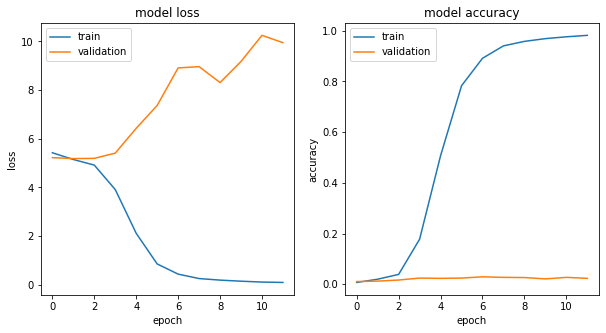

In [ ]:
plot_curves(history,['loss','accuracy'])

In [ ]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)

# construct a fully-connected layer header to output the predicted
# bounding box coordinates
#bboxHead = Dense(128, activation="relu")(flatten)
#bboxHead = Dense(64, activation="relu")(bboxHead)
#bboxHead = Dense(32, activation="relu")(bboxHead)
#bboxHead = Dense(4, activation="sigmoid",name="bounding_box")(bboxHead)
# construct a second fully-connected layer head, this one to predict
# the class label
softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(196, activation="softmax",name="class_label")(softmaxHead)
# put together our model which accept an input image and then output
# bounding box coordinates and a class label
model = Model(inputs=vgg.input,outputs=softmaxHead)

In [ ]:
opt = Adam(lr=0.00005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, mode='auto',restore_best_weights=True)
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50,callbacks = [early_stopping],verbose=1)

Epoch 1/50
165/165 [==============================] - 21s 123ms/step - loss: 5.3230 - accuracy: 0.0074 - val_loss: 5.2723 - val_accuracy: 0.0049
Epoch 2/50
165/165 [==============================] - 20s 120ms/step - loss: 5.2487 - accuracy: 0.0116 - val_loss: 5.2560 - val_accuracy: 0.0102
Epoch 3/50
165/165 [==============================] - 20s 119ms/step - loss: 5.1943 - accuracy: 0.0156 - val_loss: 5.2094 - val_accuracy: 0.0242
Epoch 4/50
165/165 [==============================] - 20s 123ms/step - loss: 5.0957 - accuracy: 0.0295 - val_loss: 5.1513 - val_accuracy: 0.0239
Epoch 5/50
165/165 [==============================] - 20s 123ms/step - loss: 4.9622 - accuracy: 0.0422 - val_loss: 5.0562 - val_accuracy: 0.0312
Epoch 6/50
165/165 [==============================] - 20s 121ms/step - loss: 4.7946 - accuracy: 0.0606 - val_loss: 4.9364 - val_accuracy: 0.0467
Epoch 7/50
165/165 [==============================] - 20s 120ms/step - loss: 4.5787 - accuracy: 0.0868 - val_loss: 4.8076 - val_ac

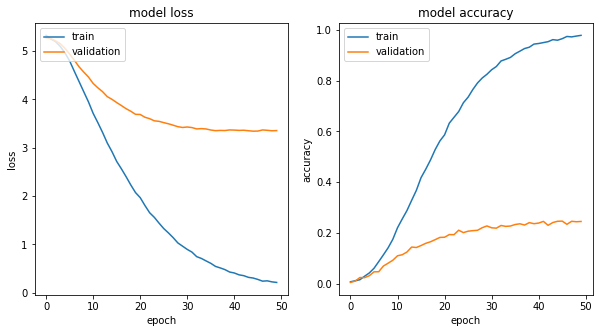

In [ ]:
plot_curves(history,['loss','accuracy'])

In [ ]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)

# construct a fully-connected layer header to output the predicted
# bounding box coordinates
#bboxHead = Dense(128, activation="relu")(flatten)
#bboxHead = Dense(64, activation="relu")(bboxHead)
#bboxHead = Dense(32, activation="relu")(bboxHead)
#bboxHead = Dense(4, activation="sigmoid",name="bounding_box")(bboxHead)
# construct a second fully-connected layer head, this one to predict
# the class label
softmaxHead = Dense(1024, activation="relu")(flatten)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(1024, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(196, activation="softmax",name="class_label")(softmaxHead)
# put together our model which accept an input image and then output
# bounding box coordinates and a class label
model = Model(inputs=vgg.input,outputs=softmaxHead)

In [ ]:
opt = Adam(lr=0.00003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

NameError: ignored

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, mode='auto',restore_best_weights=True)
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100,callbacks = [early_stopping],verbose=1)

Epoch 1/100
165/165 [==============================] - 21s 122ms/step - loss: 5.3360 - accuracy: 0.0063 - val_loss: 5.2774 - val_accuracy: 0.0088
Epoch 2/100
165/165 [==============================] - 20s 120ms/step - loss: 5.2802 - accuracy: 0.0076 - val_loss: 5.2670 - val_accuracy: 0.0102
Epoch 3/100
165/165 [==============================] - 20s 120ms/step - loss: 5.2550 - accuracy: 0.0106 - val_loss: 5.2581 - val_accuracy: 0.0116
Epoch 4/100
165/165 [==============================] - 20s 119ms/step - loss: 5.2160 - accuracy: 0.0143 - val_loss: 5.2387 - val_accuracy: 0.0147
Epoch 5/100
165/165 [==============================] - 20s 122ms/step - loss: 5.1719 - accuracy: 0.0182 - val_loss: 5.1917 - val_accuracy: 0.0228
Epoch 6/100
165/165 [==============================] - 20s 120ms/step - loss: 5.0953 - accuracy: 0.0264 - val_loss: 5.1288 - val_accuracy: 0.0235
Epoch 7/100
165/165 [==============================] - 20s 121ms/step - loss: 4.9870 - accuracy: 0.0384 - val_loss: 5.0447 -

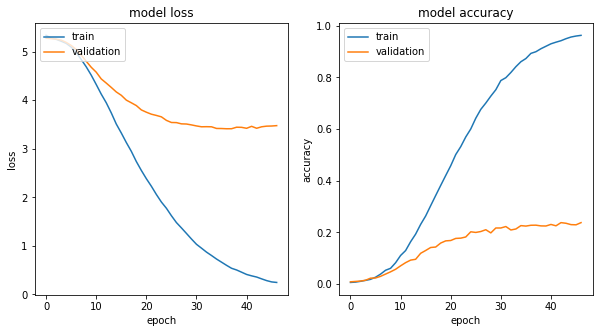

In [ ]:
plot_curves(history,['loss','accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.10)
test_datagen  = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(df_train,directory=None, x_col='Resize_Image_Path', y_col='Car_Name',subset="training",weight_col=None,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32,shuffle=True)
valid_generator = train_datagen.flow_from_dataframe(df_train,directory=None, x_col='Resize_Image_Path', y_col='Car_Name',subset="validation",weight_col=None,target_size=(224,224),color_mode='rgb',class_mode='categorical',batch_size=32,shuffle=True)
test_generator = test_datagen.flow_from_dataframe(df_test,directory=None, x_col='Resize_Image_Path', y_col=None,weight_col=None,target_size=(224,224),color_mode='rgb',class_mode=None,batch_size=32,shuffle=False)

Found 7330 validated image filenames belonging to 196 classes.
Found 814 validated image filenames belonging to 196 classes.
Found 8041 validated image filenames.


In [ ]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)

# construct a fully-connected layer header to output the predicted
# bounding box coordinates
#bboxHead = Dense(128, activation="relu")(flatten)
#bboxHead = Dense(64, activation="relu")(bboxHead)
#bboxHead = Dense(32, activation="relu")(bboxHead)
#bboxHead = Dense(4, activation="sigmoid",name="bounding_box")(bboxHead)
# construct a second fully-connected layer head, this one to predict
# the class label
softmaxHead = Dense(1024, activation="relu")(flatten)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(1024, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(196, activation="softmax",name="class_label")(softmaxHead)
# put together our model which accept an input image and then output
# bounding box coordinates and a class label
model = Model(inputs=vgg.input,outputs=softmaxHead)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
opt = Adam(lr=0.00003)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=10, mode='auto',restore_best_weights=True)
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=100,callbacks = [early_stopping],verbose=1)

Epoch 1/100
165/165 [==============================] - 169s 899ms/step - loss: 5.3308 - accuracy: 0.0048 - val_loss: 5.2768 - val_accuracy: 0.0067
Epoch 2/100
165/165 [==============================] - 26s 156ms/step - loss: 5.2787 - accuracy: 0.0078 - val_loss: 5.2688 - val_accuracy: 0.0077
Epoch 3/100
165/165 [==============================] - 25s 152ms/step - loss: 5.2489 - accuracy: 0.0099 - val_loss: 5.2582 - val_accuracy: 0.0095
Epoch 4/100
165/165 [==============================] - 25s 150ms/step - loss: 5.2277 - accuracy: 0.0146 - val_loss: 5.2394 - val_accuracy: 0.0130
Epoch 5/100
165/165 [==============================] - 25s 151ms/step - loss: 5.1830 - accuracy: 0.0215 - val_loss: 5.2105 - val_accuracy: 0.0214
Epoch 6/100
165/165 [==============================] - 25s 150ms/step - loss: 5.1221 - accuracy: 0.0236 - val_loss: 5.1546 - val_accuracy: 0.0267
Epoch 7/100
165/165 [==============================] - 25s 153ms/step - loss: 5.0245 - accuracy: 0.0363 - val_loss: 5.0769 

In [ ]:
model.evaluate_generator(generator=valid_generator,
steps=STEP_SIZE_VALID)

[8.087203025817871, 0.01785714365541935]

In [ ]:
test_generator.reset()
pred=model.predict_generator(test_generator,
steps=STEP_SIZE_TEST,
verbose=1)

251/251 [==============================] - 4308s 17s/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)

In [ ]:
labels = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

In [ ]:
predictions

['Chevrolet Cobalt SS 2010',
 'Lamborghini Diablo Coupe 2001',
 'Chevrolet Silverado 2500HD Regular Cab 2012',
 'Daewoo Nubira Wagon 2002',
 'FIAT 500 Convertible 2012',
 'Suzuki Kizashi Sedan 2012',
 'Buick Rainier SUV 2007',
 'Bugatti Veyron 16.4 Coupe 2009',
 'Volkswagen Golf Hatchback 1991',
 'Honda Accord Sedan 2012',
 'Hyundai Azera Sedan 2012',
 'Hyundai Santa Fe SUV 2012',
 'Bentley Continental Flying Spur Sedan 2007',
 'Nissan 240SX Coupe 1998',
 'Chevrolet Silverado 1500 Classic Extended Cab 2007',
 'GMC Savana Van 2012',
 'Chrysler 300 SRT-8 2010',
 'Porsche Panamera Sedan 2012',
 'Ford GT Coupe 2006',
 'Chrysler PT Cruiser Convertible 2008',
 'Ford GT Coupe 2006',
 'Acura TL Type-S 2008',
 'Jeep Grand Cherokee SUV 2012',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',
 'Buick Rainier SUV 2007',
 'Hyundai Tucson SUV 2012',
 'BMW X5 SUV 2007',
 'Land Rover LR2 SUV 2012',
 'Acura RL Sedan 2012',
 'BMW M6 Convertible 2010',
 'Dodge Dakota Crew Cab 2010',
 'Mazda T

Object Detection

In [ ]:
df_train.head(2)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width,Img_AR,bb_width,bb_height,bb_AR,img_area,bb_area,Images,Resize_Image_Path
0,00001.jpg,39.0,116.0,569.0,375.0,14,C:\Users\uprak\capstone\Car Images\Train Image...,Audi TTS Coupe 2012,"[39.0, 116.0, 569.0, 375.0]",400,600,1.500000,530.0,259.0,2.046332,240000,137270.0,[[[101 119 123]\n [ 98 116 120]\n [ 93 111 1...,/content/drive/My Drive/capstone/Car Images/tr...
1,00002.jpg,36.0,116.0,868.0,587.0,3,C:\Users\uprak\capstone\Car Images\Train Image...,Acura TL Sedan 2012,"[36.0, 116.0, 868.0, 587.0]",675,900,1.333333,832.0,471.0,1.766454,607500,391872.0,[[[164 169 175]\n [166 171 177]\n [169 174 1...,/content/drive/My Drive/capstone/Car Images/tr...


In [ ]:
df_tr = df_train[['Image_Name','Start_x','Start_y','End_x','End_y','Car_Name','Orig_img_height','Orig_img_width','Image_Path']]
df_ts = df_test[['Image_Name','Start_x','Start_y','End_x','End_y','Car_Name','Orig_img_height','Orig_img_width','Image_Path']]
df_tr['Start_x'] = df_tr.Start_x.astype(float)
df_ts['Start_x'] = df_ts.Start_x.astype(float)
filename = os.path.join("/content/drive/My Drive/capstone","df_tr.csv")
df_tr.to_csv(filename, index=False)
filename = os.path.join("/content/drive/My Drive/capstone","df_ts.csv")
df_ts.to_csv(filename, index=False)

In [ ]:
df_ts = df_test[['Image_Name','Start_x','Start_y','End_x','End_y','Car_Name','Orig_img_height','Orig_img_width','Image_Path']]
df_ts['Start_x'] = df_ts.Start_x.astype(float)
filename = os.path.join("/content/drive/My Drive/capstone","df_ts.csv")
df_ts.to_csv(filename, index=False)

In [ ]:
data=[]
labels = []
bboxes = []
imagePaths = []


In [ ]:
csvPath = os.path.join("/content/drive/My Drive/capstone","df_tr.csv")
rows = open(csvPath).read().strip().split("\n")
for row in rows:
    row = row.split(",")
    if row[0] == 'Image_Name':
        pass
    else:
        (filename, start_x, start_y, end_x, end_y, label,h,w,imagePath) = row
        start_x = float(start_x) / int(w)
        start_y = float(start_y) / int(h)
        end_x = float(end_x) / int(w)
        end_y = float(end_y) / int(h)
        #imagePath = os.path.join('/content/drive/My Drive/capstone/Car Images/train_img_resize/',filename)
        #image = load_img(imagePath, target_size=(224, 224))
        image = load_img(imagePath,grayscale=True)
        image = img_to_array(image)
        file_to_save = os.path.join("/content/drive/My Drive/capstone/gray_train/",filename)
        save_img(file_to_save,image)
        data.append(image)
        labels.append(label)
        bboxes.append((start_x, start_y, end_x, end_y))
        imagePaths.append(imagePath)

In [ ]:
csvPath = os.path.join("/content/drive/My Drive/capstone","df_ts.csv")
rows = open(csvPath).read().strip().split("\n")
for row in rows:
    row = row.split(",")
    if row[0] == 'Image_Name':
        pass
    else:
        (filename, start_x, start_y, end_x, end_y, label,h,w,imagePath) = row
        start_x = float(start_x) / int(w)
        start_y = float(start_y) / int(h)
        end_x = float(end_x) / int(w)
        end_y = float(end_y) / int(h)
        #imagePath = os.path.join('/content/drive/My Drive/capstone/Car Images/train_img_resize/',filename)
        #image = load_img(imagePath, target_size=(224, 224))
        image = load_img(imagePath,grayscale=True)
        image = img_to_array(image)
        file_to_save = os.path.join("/content/drive/My Drive/capstone/gray_test/",filename)
        save_img(file_to_save,image)
        #data.append(image)
        #labels.append(label)
        #bboxes.append((start_x, start_y, end_x, end_y))
        #imagePaths.append(imagePath)

In [ ]:
def flip(img,flip_code=1):
    #image = cv.imread(img,BGR2RGB)
    image = cv.flip(img,flip_code)
    return image

In [ ]:
def randomcrop(img, box, scale=0.5):
    '''
    ### Random Crop ###
    img: image
    gt_boxes: format [[obj x1 y1 x2 y2],...]
    scale: percentage of cropped area
    '''
    
    # Crop image
    height, width = int(img.shape[0]*scale), int(img.shape[1]*scale)
    x = random.randint(0, img.shape[0] - int(width))
    y = random.randint(0, img.shape[1] - int(height))
    cropped = img[y:y+height, x:x+width]
    resized = cv.resize(cropped, (img.shape[0], img.shape[1]))
    print("bbox initially",box)
    print(height,width)
    # Modify annotation
    new_boxes=[]
    x1 = int(float(box[0])*(img.shape[0]))
    y1 = int(float(box[1])*(img.shape[1]))
    x2 = int(float(box[2])*(img.shape[0]))
    y2 = int(float(box[3])*(img.shape[1]))
    x1, x2 = x1-x, x2-x
    y1, y2 = y1-y, y2-y
    x1, y1, x2, y2 = x1/scale, y1/scale, x2/scale, y2/scale
    print(x1,y1,x2,y2)
    if (x1<img.shape[0] and y1<img.shape[1]) and (x2>0 and y2>0):
        if x1<0: x1=0
        if y1<0: y1=0
        if x2>img.shape[1]: x2=img.shape[1]
        if y2>img.shape[0]: y2=img.shape[0]
        new_boxes = list((x1, y1, x2, y2))

        print(x1, y1, x2, y2,new_boxes)
    return resized, new_boxes

In [ ]:
def colorjitter(img, cj_type="b"):
    '''
    ### Different Color Jitter ###
    img: image
    cj_type: {b: brightness, s: saturation, c: constast}
    '''
    if cj_type == "b":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        if value >= 0:
            lim = 255 - value
            v[v > lim] = 255
            v[v <= lim] += value
        else:
            lim = np.absolute(value)
            v[v < lim] = 0
            v[v >= lim] -= np.absolute(value)

        final_hsv = cv.merge((h, s, v))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "s":
        # value = random.randint(-50, 50)
        value = np.random.choice(np.array([-50, -40, -30, 30, 40, 50]))
        hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
        h, s, v = cv.split(hsv)
        if value >= 0:
            lim = 255 - value
            s[s > lim] = 255
            s[s <= lim] += value
        else:
            lim = np.absolute(value)
            s[s < lim] = 0
            s[s >= lim] -= np.absolute(value)

        final_hsv = cv.merge((h, s, v))
        img = cv.cvtColor(final_hsv, cv.COLOR_HSV2BGR)
        return img
    
    elif cj_type == "c":
        brightness = 10
        contrast = random.randint(40, 100)
        dummy = np.int16(img)
        dummy = dummy * (contrast/127+1) - contrast + brightness
        dummy = np.clip(dummy, 0, 255)
        img = np.uint8(dummy)
        return img

In [ ]:
def filters(img, f_type = "blur"):
    '''
    ### Filtering ###
    img: image
    f_type: {blur: blur, gaussian: gaussian, median: median}
    '''
    if f_type == "blur":
        image=img.copy()
        fsize = 9
        return cv.blur(image,(fsize,fsize))
    
    elif f_type == "gaussian":
        image=img.copy()
        fsize = 9
        return cv.GaussianBlur(image, (fsize, fsize), 0)
    
    elif f_type == "median":
        image=img.copy()
        fsize = 9
        return cv.medianBlur(image, fsize)

In [ ]:
def augment_image(csvfile):
    bboxes = []
    file_name = []
    file_path = []
    labels = []
    height = []
    width = []
    rows = open(csvPath).read().strip().split("\n")
    for row in rows:
        row = row.split(",")
        if row[0] == 'Image_Name':
            pass
        else:
            (filename, start_x, start_y, end_x, end_y, label,h,w,imagePath) = row
            #start_x = float(start_x) / int(w)
            #start_y = float(start_y) / int(h)
            #end_x = float(end_x) / int(w)
            #end_y = float(end_y) / int(h)
            image = load_img(imagePath)
            image = img_to_array(image)
            img = flip(image,1)
            fname = filename.split(".")
            dest_file = fname[0] + "_flip." + fname[1]
            print(dest_file)
            file_to_save = os.path.join("/content/drive/My Drive/capstone/augmented/",dest_file)
            save_img(file_to_save,img)
            bboxes.append((start_x, start_y, end_x, end_y))
            file_path.append(file_to_save)
            file_name.append(dest_file)
            labels.append(label)
            height.append(h)
            width.append(w)

            #random crop
            #bbox = list((start_x,start_y,end_x,end_y))
            #print(bbox)
            #img,bbox = randomcrop(image,bbox,scale=0.5)
            #dest_file = fname[0] + "rcrop." + fname[1]
            #print(dest_file)
            #file_to_save = os.path.join("/content/drive/My Drive/capstone/augmented/",dest_file)
            #save_img(file_to_save,img)
            #print(bbox)
            #start_x = int(bbox[0])
            #start_y = int(bbox[1])
            #end_x = int(bbox[2])
            #end_y = int(bbox[3])
            #bboxes.append((start_x, start_y, end_x, end_y))
            #file_path.append(file_to_save)
            #file_name.append(dest_file)
            #labels.append(label)
            #height.append(h)
            #width.append(w)


    return file_name,bboxes,labels,file_path,h,w
    #return height,width

In [ ]:
csvPath = os.path.join("/content/drive/My Drive/capstone","df_tr.csv")
files,bboxes,labels,fpaths,ht,wd = augment_image(csvPath)

Streaming output truncated to the last 5000 lines.
03145_flip.jpg
03146_flip.jpg
03147_flip.jpg
03148_flip.jpg
03149_flip.jpg
03150_flip.jpg
03151_flip.jpg
03152_flip.jpg
03153_flip.jpg
03154_flip.jpg
03155_flip.jpg
03156_flip.jpg
03157_flip.jpg
03158_flip.jpg
03159_flip.jpg
03160_flip.jpg
03161_flip.jpg
03162_flip.jpg
03163_flip.jpg
03164_flip.jpg
03165_flip.jpg
03166_flip.jpg
03167_flip.jpg
03168_flip.jpg
03169_flip.jpg
03170_flip.jpg
03171_flip.jpg
03172_flip.jpg
03173_flip.jpg
03174_flip.jpg
03175_flip.jpg
03176_flip.jpg
03177_flip.jpg
03178_flip.jpg
03179_flip.jpg
03180_flip.jpg
03181_flip.jpg
03182_flip.jpg
03183_flip.jpg
03184_flip.jpg
03185_flip.jpg
03186_flip.jpg
03187_flip.jpg
03188_flip.jpg
03189_flip.jpg
03190_flip.jpg
03191_flip.jpg
03192_flip.jpg
03193_flip.jpg
03194_flip.jpg
03195_flip.jpg
03196_flip.jpg
03197_flip.jpg
03198_flip.jpg
03199_flip.jpg
03200_flip.jpg
03201_flip.jpg
03202_flip.jpg
03203_flip.jpg
03204_flip.jpg
03205_flip.jpg
03206_flip.jpg
03207_flip.jpg
0320

In [ ]:
labels

['Audi TTS Coupe 2012',
 'Acura TL Sedan 2012',
 'Dodge Dakota Club Cab 2007',
 'Hyundai Sonata Hybrid Sedan 2012',
 'Ford F-450 Super Duty Crew Cab 2012',
 'Geo Metro Convertible 1993',
 'Dodge Journey SUV 2012',
 'Dodge Charger Sedan 2012',
 'Mitsubishi Lancer Sedan 2012',
 'Chevrolet Traverse SUV 2012',
 'Buick Verano Sedan 2012',
 'Toyota Sequoia SUV 2012',
 'Hyundai Elantra Sedan 2007',
 'Dodge Caravan Minivan 1997',
 'Volvo C30 Hatchback 2012',
 'Plymouth Neon Coupe 1999',
 'Audi TTS Coupe 2012',
 'Chevrolet Malibu Sedan 2007',
 'Volkswagen Beetle Hatchback 2012',
 'Chevrolet Corvette Ron Fellows Edition Z06 2007',
 'Chrysler 300 SRT-8 2010',
 'BMW M6 Convertible 2010',
 'GMC Yukon Hybrid SUV 2012',
 'Nissan Juke Hatchback 2012',
 'Volvo 240 Sedan 1993',
 'Hyundai Sonata Hybrid Sedan 2012',
 'Suzuki SX4 Sedan 2012',
 'Dodge Ram Pickup 3500 Crew Cab 2010',
 'Spyker C8 Coupe 2009',
 'Volvo 240 Sedan 1993',
 'Land Rover Range Rover SUV 2012',
 'Hyundai Elantra Touring Hatchback 2012

In [ ]:
car_class = []
for car in labels:
    for i,v in car_dict.items():
        if car == v:
            car_class.append(int(i))
        else:
            pass
car_class


[14,
 3,
 91,
 134,
 106,
 123,
 89,
 96,
 167,
 58,
 49,
 186,
 135,
 85,
 193,
 172,
 14,
 73,
 192,
 57,
 79,
 36,
 120,
 170,
 194,
 134,
 184,
 86,
 180,
 194,
 154,
 139,
 66,
 133,
 154,
 104,
 38,
 97,
 105,
 142,
 13,
 191,
 119,
 38,
 186,
 25,
 194,
 177,
 173,
 42,
 91,
 148,
 15,
 97,
 42,
 53,
 44,
 65,
 90,
 124,
 114,
 190,
 101,
 187,
 8,
 17,
 111,
 122,
 5,
 29,
 126,
 94,
 106,
 106,
 188,
 59,
 110,
 43,
 133,
 111,
 8,
 192,
 18,
 116,
 49,
 145,
 49,
 170,
 20,
 114,
 165,
 138,
 175,
 112,
 122,
 104,
 57,
 51,
 37,
 71,
 193,
 105,
 61,
 74,
 133,
 162,
 131,
 88,
 121,
 180,
 180,
 137,
 133,
 71,
 83,
 110,
 42,
 177,
 147,
 161,
 109,
 28,
 144,
 53,
 29,
 66,
 79,
 13,
 136,
 143,
 171,
 89,
 135,
 161,
 58,
 122,
 178,
 56,
 184,
 191,
 40,
 60,
 155,
 71,
 140,
 42,
 76,
 187,
 86,
 8,
 5,
 47,
 30,
 18,
 149,
 174,
 138,
 179,
 24,
 42,
 73,
 176,
 1,
 37,
 36,
 108,
 41,
 40,
 119,
 119,
 19,
 163,
 120,
 54,
 116,
 66,
 50,
 122,
 155,
 142,
 68,
 170,

In [ ]:
df_augment = pd.DataFrame(files,columns=['Image_Name'])
df_augment['Image_class'] = car_class
df_augment['Bbox'] = bboxes
df_augment['Image_Path'] = fpaths
df_augment['Car_Name'] = labels

In [ ]:
df_augment.sample(5)

,Image_Name,Image_class,Bbox,Image_Path,Car_Name
1858,01859_flip.jpg,172,"(114.0, 11.0, 542.0, 414.0)",/content/drive/My Drive/capstone/augmented/018...,Plymouth Neon Coupe 1999
6546,06547_flip.jpg,70,"(27.0, 153.0, 620.0, 471.0)",/content/drive/My Drive/capstone/augmented/065...,Chevrolet Silverado 1500 Classic Extended Cab ...
5161,05162_flip.jpg,20,"(29.0, 32.0, 472.0, 331.0)",/content/drive/My Drive/capstone/augmented/051...,Audi S6 Sedan 2011
1588,01589_flip.jpg,15,"(35.0, 120.0, 605.0, 413.0)",/content/drive/My Drive/capstone/augmented/015...,Audi R8 Coupe 2012
7853,07854_flip.jpg,21,"(91.0, 337.0, 1014.0, 749.0)",/content/drive/My Drive/capstone/augmented/078...,Audi S5 Convertible 2012


In [ ]:
startX = []
startY = []
endX = []
endY = []
for bbox in df_augment['Bbox'].values:
    startX.append(float(bbox[0]))
    startY.append(float(bbox[1]))
    endX.append(float(bbox[2]))
    endY.append(float(bbox[3]))

df_augment['Start_x'] = startX
df_augment['Start_y'] = startY
df_augment['End_x'] = endX
df_augment['End_y'] = endY
df_augment['Orig_img_height'] = ht
df_augment['Orig_img_width'] = wd


In [ ]:
df_augment

,Image_Name,Image_class,Bbox,Image_Path,Car_Name,Start_x,Start_y,End_x,End_y,Orig_img_height,Orig_img_width
0,00001_flip.jpg,14,"(39.0, 116.0, 569.0, 375.0)",/content/drive/My Drive/capstone/augmented/000...,Audi TTS Coupe 2012,39.0,116.0,569.0,375.0,400,600
1,00002_flip.jpg,3,"(36.0, 116.0, 868.0, 587.0)",/content/drive/My Drive/capstone/augmented/000...,Acura TL Sedan 2012,36.0,116.0,868.0,587.0,675,900
2,00003_flip.jpg,91,"(85.0, 109.0, 601.0, 381.0)",/content/drive/My Drive/capstone/augmented/000...,Dodge Dakota Club Cab 2007,85.0,109.0,601.0,381.0,480,640
3,00004_flip.jpg,134,"(621.0, 393.0, 1484.0, 1096.0)",/content/drive/My Drive/capstone/augmented/000...,Hyundai Sonata Hybrid Sedan 2012,621.0,393.0,1484.0,1096.0,1386,2100
4,00005_flip.jpg,106,"(14.0, 36.0, 133.0, 99.0)",/content/drive/My Drive/capstone/augmented/000...,Ford F-450 Super Duty Crew Cab 2012,14.0,36.0,133.0,99.0,108,144
...,...,...,...,...,...,...,...,...,...,...,...
8139,08140_flip.jpg,78,"(3.0, 44.0, 423.0, 336.0)",/content/drive/My Drive/capstone/augmented/081...,Chrysler Town and Country Minivan 2012,3.0,44.0,423.0,336.0,360,424
8140,08141_flip.jpg,196,"(138.0, 150.0, 706.0, 523.0)",/content/drive/My Drive/capstone/augmented/081...,smart fortwo Convertible 2012,138.0,150.0,706.0,523.0,600,800
8141,08142_flip.jpg,163,"(26.0, 246.0, 660.0, 449.0)",/content/drive/My Drive/capstone/augmented/081...,Mercedes-Benz SL-Class Coupe 2009,26.0,246.0,660.0,449.0,469,750
8142,08143_flip.jpg,112,"(78.0, 526.0, 1489.0, 908.0)",/content/drive/My Drive/capstone/augmented/081...,Ford GT Coupe 2006,78.0,526.0,1489.0,908.0,1067,1600


In [ ]:
df_augment['Bbox'] = df_augment.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)

In [ ]:
#cols = list(df_tr.columns)
df_augment = df_augment[['Image_Name','Start_x','Start_y','End_x','End_y','Car_Name','Orig_img_height','Orig_img_width','Image_Path']]
df_augment

,Image_Name,Start_x,Start_y,End_x,End_y,Car_Name,Orig_img_height,Orig_img_width,Image_Path
0,00001_flip.jpg,39.0,116.0,569.0,375.0,Audi TTS Coupe 2012,400,600,/content/drive/My Drive/capstone/augmented/000...
1,00002_flip.jpg,36.0,116.0,868.0,587.0,Acura TL Sedan 2012,675,900,/content/drive/My Drive/capstone/augmented/000...
2,00003_flip.jpg,85.0,109.0,601.0,381.0,Dodge Dakota Club Cab 2007,480,640,/content/drive/My Drive/capstone/augmented/000...
3,00004_flip.jpg,621.0,393.0,1484.0,1096.0,Hyundai Sonata Hybrid Sedan 2012,1386,2100,/content/drive/My Drive/capstone/augmented/000...
4,00005_flip.jpg,14.0,36.0,133.0,99.0,Ford F-450 Super Duty Crew Cab 2012,108,144,/content/drive/My Drive/capstone/augmented/000...
...,...,...,...,...,...,...,...,...,...
8139,08140_flip.jpg,3.0,44.0,423.0,336.0,Chrysler Town and Country Minivan 2012,360,424,/content/drive/My Drive/capstone/augmented/081...
8140,08141_flip.jpg,138.0,150.0,706.0,523.0,smart fortwo Convertible 2012,600,800,/content/drive/My Drive/capstone/augmented/081...
8141,08142_flip.jpg,26.0,246.0,660.0,449.0,Mercedes-Benz SL-Class Coupe 2009,469,750,/content/drive/My Drive/capstone/augmented/081...
8142,08143_flip.jpg,78.0,526.0,1489.0,908.0,Ford GT Coupe 2006,1067,1600,/content/drive/My Drive/capstone/augmented/081...


In [ ]:
filename = os.path.join("/content/drive/My Drive/capstone","df_augment.csv")
df_augment.to_csv(filename, index=False)

In [ ]:
csvPath = os.path.join("/content/drive/My Drive/capstone","df_tr.csv")
df_tr = pd.read_csv(csvPath)
df_tr

,Image_Name,Start_x,Start_y,End_x,End_y,Car_Name,Orig_img_height,Orig_img_width,Image_Path
0,02420_flip.jpg,24.0,55.0,607.0,427.0,Buick Verano Sedan 2012,480,640,/content/drive/My Drive/capstone/augmented/024...
1,05400_flip.jpg,14.0,37.0,244.0,165.0,Hyundai Santa Fe SUV 2012,194,259,/content/drive/My Drive/capstone/augmented/054...
2,02199_flip.jpg,4.0,56.0,395.0,229.0,Ferrari 458 Italia Coupe 2012,300,400,/content/drive/My Drive/capstone/augmented/021...
3,04232_flip.jpg,105.0,99.0,579.0,354.0,Ferrari California Convertible 2012,426,640,/content/drive/My Drive/capstone/augmented/042...
4,04435.jpg,18.0,8.0,620.0,384.0,Mercedes-Benz 300-Class Convertible 1993,480,640,/content/drive/My Drive/capstone/Dataset/Car I...
...,...,...,...,...,...,...,...,...,...
9995,01791.jpg,40.0,58.0,1916.0,1018.0,Nissan Juke Hatchback 2012,1080,1919,/content/drive/My Drive/capstone/Dataset/Car I...
9996,01782_flip.jpg,48.0,9.0,610.0,247.0,Audi 100 Sedan 1994,303,635,/content/drive/My Drive/capstone/augmented/017...
9997,00075.jpg,45.0,74.0,522.0,253.0,Toyota Corolla Sedan 2012,286,550,/content/drive/My Drive/capstone/Dataset/Car I...
9998,07156_flip.jpg,38.0,30.0,197.0,163.0,Ford Freestar Minivan 2007,207,244,/content/drive/My Drive/capstone/augmented/071...


In [ ]:
filename = os.path.join("/content/drive/My Drive/capstone","df_augment.csv")
df_augment = pd.read_csv(filename)
df_augment

,Image_Name,Start_x,Start_y,End_x,End_y,Car_Name,Orig_img_height,Orig_img_width,Image_Path
0,00001_flip.jpg,39.0,116.0,569.0,375.0,Audi TTS Coupe 2012,400,600,/content/drive/My Drive/capstone/augmented/000...
1,00002_flip.jpg,36.0,116.0,868.0,587.0,Acura TL Sedan 2012,675,900,/content/drive/My Drive/capstone/augmented/000...
2,00003_flip.jpg,85.0,109.0,601.0,381.0,Dodge Dakota Club Cab 2007,480,640,/content/drive/My Drive/capstone/augmented/000...
3,00004_flip.jpg,621.0,393.0,1484.0,1096.0,Hyundai Sonata Hybrid Sedan 2012,1386,2100,/content/drive/My Drive/capstone/augmented/000...
4,00005_flip.jpg,14.0,36.0,133.0,99.0,Ford F-450 Super Duty Crew Cab 2012,108,144,/content/drive/My Drive/capstone/augmented/000...
...,...,...,...,...,...,...,...,...,...
8139,08140_flip.jpg,3.0,44.0,423.0,336.0,Chrysler Town and Country Minivan 2012,360,424,/content/drive/My Drive/capstone/augmented/081...
8140,08141_flip.jpg,138.0,150.0,706.0,523.0,smart fortwo Convertible 2012,600,800,/content/drive/My Drive/capstone/augmented/081...
8141,08142_flip.jpg,26.0,246.0,660.0,449.0,Mercedes-Benz SL-Class Coupe 2009,469,750,/content/drive/My Drive/capstone/augmented/081...
8142,08143_flip.jpg,78.0,526.0,1489.0,908.0,Ford GT Coupe 2006,1067,1600,/content/drive/My Drive/capstone/augmented/081...


In [ ]:
df_tr = df_tr.append(df_augment)

In [ ]:
df_tr = df_tr.sample(10000)
df_tr.reset_index(inplace=True)
df_tr = df_tr.drop(columns=['index'])
df_tr

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py", line 2882, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-12-b1c874ce54a3>", line 3, in <module>
    df_tr = df_tr.drop(columns=['index','level_0'])
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py", line 4174, in drop
    errors=errors,
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py", line 3889, in drop
    obj = obj._drop_axis(labels, axis, level=level, errors=errors)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py", line 3923, in _drop_axis
    new_axis = axis.drop(labels, errors=errors)
  File "/usr/local/lib/python3.7/dist-packages/pandas/core/indexes/base.py", line 5287, in drop
    raise KeyError(f"{labels[mask]} not found in axis")
KeyError: "['level_0'] not found in axis"

During handling of the above exception, another exception occurred:

Traceback (most r

KeyError: ignored

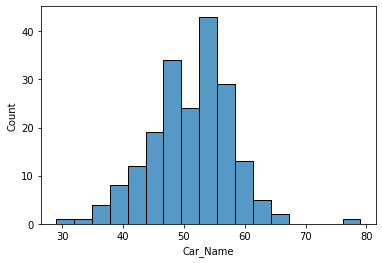

In [ ]:
sns.histplot(df_tr['Car_Name'].value_counts())

In [ ]:
filename = os.path.join("/content/drive/My Drive/capstone","df_tr.csv")
df_tr.to_csv(filename, index=False)

In [ ]:
#data=[]
#labels = []
#bboxes = []
#imagePaths = []

#csvPath = os.path.join("/content/drive/My Drive/capstone","df_augment.csv")
#rows = open(csvPath).read().strip().split("\n")
#for row in rows:
#    row = row.split(",")
#    if row[0] == 'Image_Name':
#        pass
#    else:
#        (filename, start_x, start_y, end_x, end_y, label,h,w,imagePath) = row
#        start_x = float(start_x) / int(w)
#        start_y = float(start_y) / int(h)
#        end_x = float(end_x) / int(w)
#        end_y = float(end_y) / int(h)
        #imagePath = os.path.join('/content/drive/My Drive/capstone/Car Images/train_img_resize/',filename)
        #image = load_img(imagePath, target_size=(224, 224))
#        image = load_img(imagePath,grayscale=True)
#        image = img_to_array(image)
#        file_to_save = os.path.join("/content/drive/My Drive/capstone/gray_train/",filename)
#        save_img(file_to_save,image)
#        data.append(image)
#        labels.append(label)
#        bboxes.append((start_x, start_y, end_x, end_y))
#        imagePaths.append(imagePath)

In [ ]:
#data=[]
#labels = []
#bboxes = []
#imagePaths = []

#csvPath = os.path.join("/content/drive/My Drive/capstone","df_tr.csv")
#rows = open(csvPath).read().strip().split("\n")
#for row in rows:
#    row = row.split(",")
#    if row[0] == 'Image_Name':
#        pass
#    else:
#        (filename, start_x, start_y, end_x, end_y, label,_,_,_) = row
#        start_x = float(start_x) 
#        start_y = float(start_y) 
#        end_x = float(end_x) 
#        end_y = float(end_y) 
#        im_path = os.path.join('/content/drive/My Drive/capstone/gray_train/',filename)
#        image = load_img(im_path)
#        image = img_to_array(image)
#        data.append(image)
#        labels.append(label)
#        bboxes.append((start_x, start_y, end_x, end_y))
#        imagePaths.append(im_path)

In [ ]:
df_test.sample(3)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width,Images,Resize_Image_Path
3482,03483.jpg,77.0,96.0,576.0,367.0,196,/content/drive/My Drive/capstone/Dataset/Car I...,smart fortwo Convertible 2012,"[77.0, 96.0, 576.0, 367.0]",405,640,[[[ 96 75 44]\n [ 95 74 43]\n [ 94 73 ...,/content/drive/My Drive/capstone/Car Images/te...
1353,01354.jpg,27.0,68.0,605.0,407.0,62,/content/drive/My Drive/capstone/Dataset/Car I...,Chevrolet Tahoe Hybrid SUV 2012,"[27.0, 68.0, 605.0, 407.0]",480,640,[[[ 71 121 172]\n [ 71 120 178]\n [ 71 119 1...,/content/drive/My Drive/capstone/Car Images/te...
1778,01779.jpg,16.0,50.0,286.0,184.0,136,/content/drive/My Drive/capstone/Dataset/Car I...,Hyundai Accent Sedan 2012,"[16.0, 50.0, 286.0, 184.0]",225,300,[[[ 66 83 90]\n [ 64 81 88]\n [ 73 90 ...,/content/drive/My Drive/capstone/Car Images/te...


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.20)
test_datagen  = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(df_tr,directory=None, x_col='Image_Path', y_col='Car_Name',subset="training",weight_col=None,target_size=(256,256),color_mode='grayscale',class_mode='categorical',batch_size=128,shuffle=True)
valid_generator = train_datagen.flow_from_dataframe(df_tr,directory=None, x_col='Image_Path', y_col='Car_Name',subset="validation",weight_col=None,target_size=(256,256),color_mode='grayscale',class_mode='categorical',batch_size=128,shuffle=True)
test_generator = test_datagen.flow_from_dataframe(df_test,directory=None, x_col='Image_Path', y_col=None,weight_col=None,target_size=(256,256),color_mode='grayscale',class_mode=None,batch_size=128,shuffle=False)

Found 8000 validated image filenames belonging to 196 classes.
Found 2000 validated image filenames belonging to 196 classes.
Found 8041 validated image filenames.


In [ ]:
len(df_tr['Car_Name'].unique())

196

In [ ]:
X,y = train_generator.next()

In [ ]:
X.shape

(128, 256, 256, 1)

In [ ]:
X=[]
y=[]
train_generator.reset()
for i in range(train_generator.__len__()):
    a,b=train_generator.next()
    X.append(a)
    y.append(b)

#Below code to concat multiple arrays vertically
X_array = np.vstack([X[i] for i in range(len(X))])

y_array = np.vstack([y[i] for i in range(len(y))])

In [ ]:
X_array.shape

(8000, 256, 256, 1)

In [ ]:
y_array.shape

(8000, 196)

In [ ]:
file_X_train = os.path.join('/content/drive/My Drive/capstone/','X_train.npy')
file_y_train = os.path.join('/content/drive/My Drive/capstone/','y_train.npy')
np.save(file_X_train,X_array)
np.save(file_y_train,y_array)

In [ ]:
X=[]
y=[]
valid_generator.reset()
for i in range(valid_generator.__len__()):
    a,b=valid_generator.next()
    X.append(a)
    y.append(b)

#Below code to concat multiple arrays vertically
X_val = np.vstack([X[i] for i in range(len(X))])

y_val = np.vstack([y[i] for i in range(len(y))])

In [ ]:
X_val.shape

(2000, 256, 256, 1)

In [ ]:
y_val.shape

(2000, 196)

In [ ]:
file_X_val = os.path.join('/content/drive/My Drive/capstone/','X_val.npy')
file_y_val = os.path.join('/content/drive/My Drive/capstone/','y_val.npy')
np.save(file_X_val,X_val)
np.save(file_y_val,y_val)

In [ ]:
X=[]
test_generator.reset()
for i in range(test_generator.__len__()):
    a=test_generator.next()
    X.append(a)

#Below code to concat multiple arrays vertically
X_test = np.vstack([X[i] for i in range(len(X))])

In [ ]:
X_test.shape

(8041, 256, 256, 1)

In [ ]:
file_X_test = os.path.join('/content/drive/My Drive/capstone/','X_test.npy')
np.save(file_X_test,X_test)

In [ ]:
df_tr['Image_Path']

0       /content/drive/My Drive/capstone/augmented/024...
1       /content/drive/My Drive/capstone/augmented/054...
2       /content/drive/My Drive/capstone/augmented/021...
3       /content/drive/My Drive/capstone/augmented/042...
4       /content/drive/My Drive/capstone/Dataset/Car I...
                              ...                        
9995    /content/drive/My Drive/capstone/Dataset/Car I...
9996    /content/drive/My Drive/capstone/augmented/017...
9997    /content/drive/My Drive/capstone/Dataset/Car I...
9998    /content/drive/My Drive/capstone/augmented/071...
9999    /content/drive/My Drive/capstone/Dataset/Car I...
Name: Image_Path, Length: 10000, dtype: object

In [ ]:
car_img_path

'/content/drive/My Drive/capstone/Dataset/Car Images/'

In [ ]:
def read_image(path):
    im = cv.imread(str(path))
    return cv.cvtColor(im, cv.COLOR_BGR2RGB)

In [ ]:
data = []
target = os.path.join('/content/drive/My Drive/capstone/Car Images/','train_img_300_resized')
image_path = list(df_tr['Image_Path'])
image_name = list(df_tr['Image_Name'])
i=0
for p in image_path:
    to_file = os.path.join(target,image_name[i])
    im = read_image(p)
    image = np.array(tf.image.resize_with_pad(im,300,300,method=tf.image.ResizeMethod.BILINEAR,antialias=False))
    image = array_to_img(image)
    image.save(to_file)
    i = i+1


In [ ]:
df_test.sample(1)

,Image_Name,Start_x,Start_y,End_x,End_y,Image_class,Image_Path,Car_Name,Bbox,Orig_img_height,Orig_img_width,Images,Resize_Image_Path
4921,04922.jpg,46.0,87.0,566.0,346.0,47,/content/drive/My Drive/capstone/Dataset/Car I...,Buick Regal GS 2012,"[46.0, 87.0, 566.0, 346.0]",400,620,[[[213 190 149]\n [220 197 156]\n [191 163 1...,/content/drive/My Drive/capstone/Car Images/te...


In [ ]:
data = []
target = os.path.join('/content/drive/My Drive/capstone/Car Images/','test_img_300')
image_path = list(df_test['Image_Path'])
image_name = list(df_test['Image_Name'])
i=0
for p in image_path:
    print(p,' ',image_name[i])
    to_file = os.path.join(target,image_name[i])
    im = read_image(p)
    image = np.array(tf.image.resize_with_pad(im,300,300,method=tf.image.ResizeMethod.BILINEAR,antialias=False))
    image = array_to_img(image)
    image.save(to_file)
    i = i+1


Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/Scion xD Hatchback 2012/03042.jpg   03042.jpg
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/BMW M6 Convertible 2010/03043.jpg   03043.jpg
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/Ford F-450 Super Duty Crew Cab 2012/03044.jpg   03044.jpg
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/BMW M3 Coupe 2012/03045.jpg   03045.jpg
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/Lamborghini Aventador Coupe 2012/03046.jpg   03046.jpg
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/Jeep Compass SUV 2012/03047.jpg   03047.jpg
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/Ford GT Coupe 2006/03048.jpg   03048.jpg
/content/drive/My Drive/capstone/Dataset/Car Images/Test Images/Chevrolet Silverado 1500 Extended Cab 2012/03049.jpg   03049.jpg
/content/drive/My Drive/capstone/Dataset/C

In [ ]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
labels = np.array(labels)
data = np.array(data)
bboxes = np.array(bboxes)

In [ ]:
split = train_test_split(data, labels, bboxes, imagePaths,test_size=0.20, random_state=42)
(trainImages, testImages) = split[:2]
(trainLabels, testLabels) = split[2:4]
(trainBBoxes, testBBoxes) = split[4:6]
(trainPaths, testPaths) = split[6:]

In [ ]:
trainImages.shape

(6515,)

In [ ]:
trainLabels.shape

(6515, 196)

In [ ]:
trainBBoxes.shape

(6515, 4)

In [5]:
# load the VGG16 network, ensuring the head FC layers are left off
vgg = VGG16(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
# freeze all VGG layers so they will *not* be updated during the
# training process
vgg.trainable = False
# flatten the max-pooling output of VGG
flatten = vgg.output
flatten = Flatten()(flatten)

# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bboxHead = Dense(128, activation="relu")(flatten)
bboxHead = Dense(64, activation="relu")(bboxHead)
bboxHead = Dense(32, activation="relu")(bboxHead)
bboxHead = Dense(4, activation="sigmoid",name="bounding_box")(bboxHead)
# construct a second fully-connected layer head, this one to predict
# the class label
softmaxHead = Dense(512, activation="relu")(flatten)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(512, activation="relu")(softmaxHead)
softmaxHead = Dropout(0.25)(softmaxHead)
softmaxHead = Dense(196, activation="softmax",name="class_label")(softmaxHead)
# put together our model which accept an input image and then output
# bounding box coordinates and a class label
model = Model(inputs=vgg.input,outputs=[bboxHead, softmaxHead])

58900480/58889256 [==============================] - 0s 0us/step


In [6]:
INIT_LR = 0.00005
NUM_EPOCHS = 100
BATCH_SIZE = 64
# define a dictionary to set the loss methods -- categorical
# cross-entropy for the class label head and mean absolute error
# for the bounding box head
losses = {
	"bounding_box": "mean_squared_error",
	"class_label": "categorical_crossentropy"
}
# define a dictionary that specifies the weights per loss (both the
# class label and bounding box outputs will receive equal weight)
lossWeights = {
	"bounding_box": 1.0,
	"class_label": 1.0
}

metric = {
	  "bounding_box" : tf.keras.metrics.RootMeanSquaredError(),
	  "class_label" : tf.keras.metrics.Accuracy()
}

# initialize the optimizer, compile the model, and show the model
# summary
opt = Adam(lr=INIT_LR)
model.compile(loss=losses, optimizer=opt, metrics=metric, loss_weights=lossWeights)
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 224, 224, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv2 (Conv2D)          (None, 224, 224, 64  36928       ['block1_conv1[0][0]']           
                                )                                                             

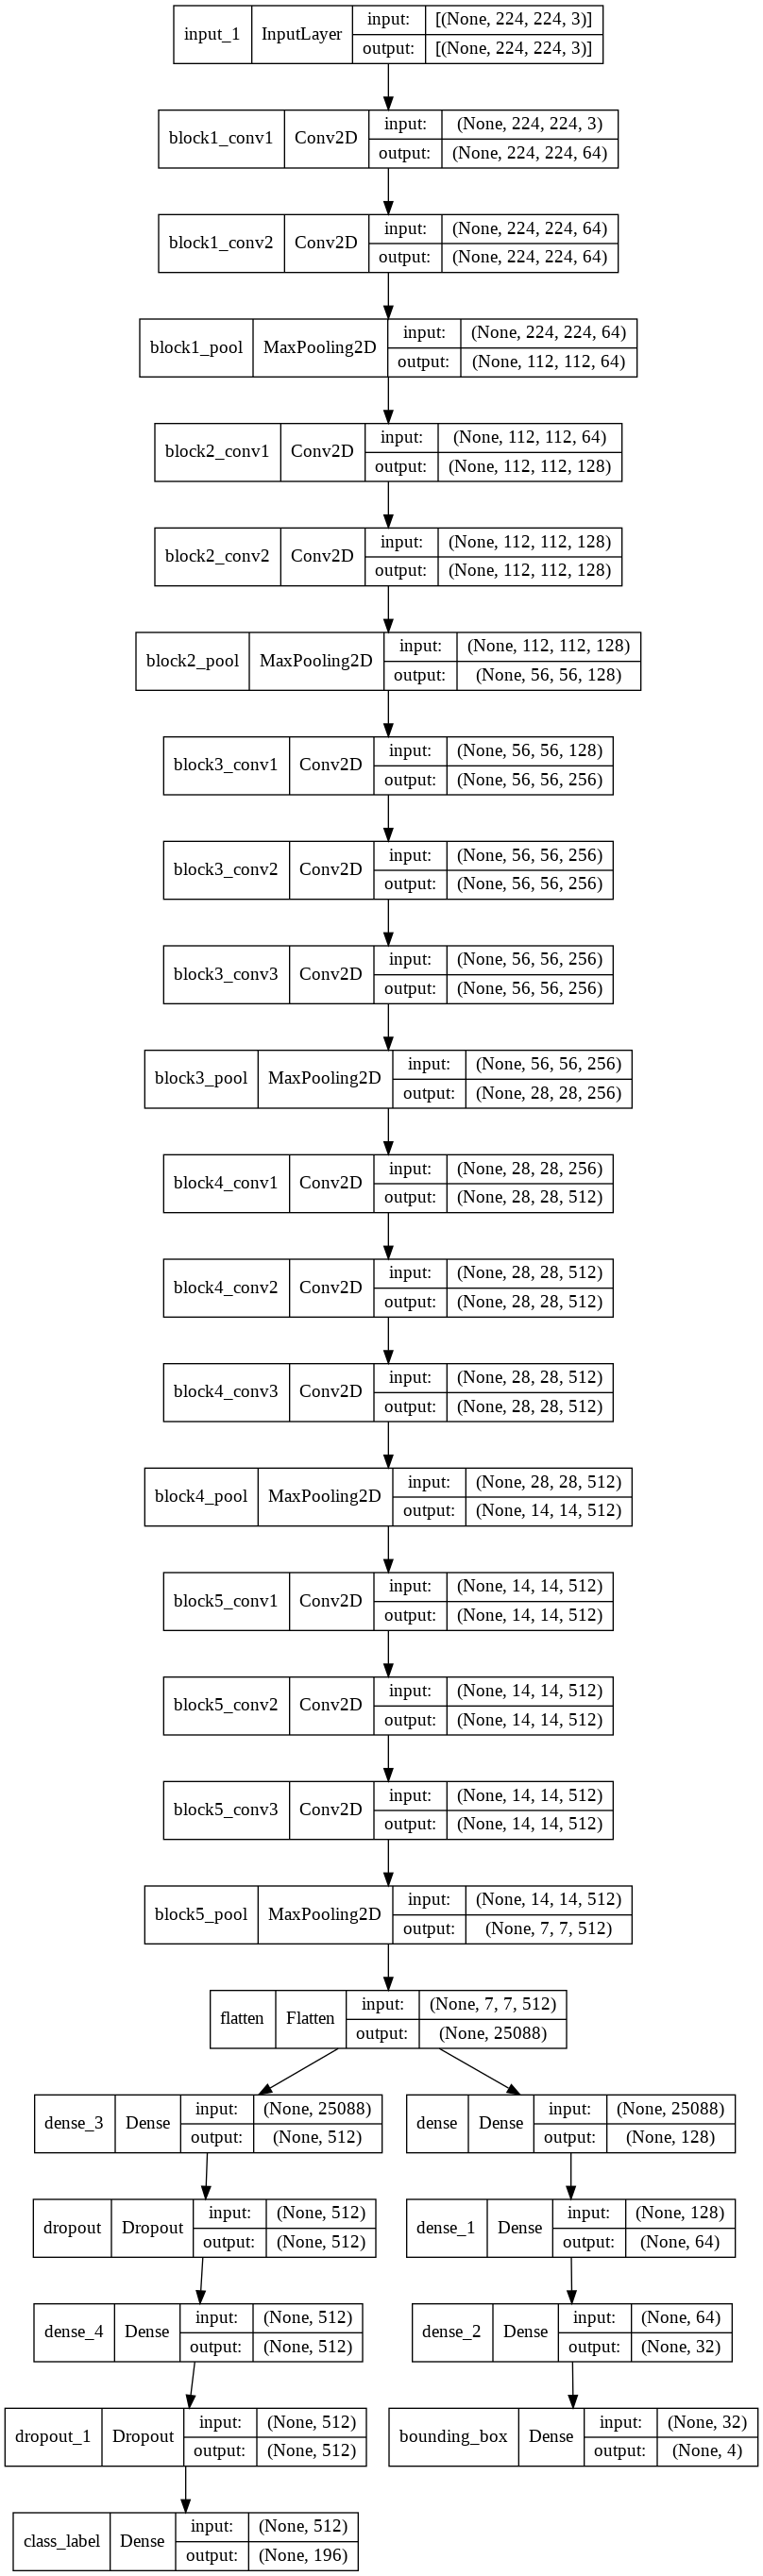

In [8]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
trainTargets = {
	"class_label": trainLabels,
	"bounding_box": trainBBoxes
}
# construct a second dictionary, this one for our target testing
# outputs
testTargets = {
	"class_label": testLabels,
	"bounding_box": testBBoxes
}

In [ ]:
print("[INFO] training model...")
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', verbose=1, patience=30, mode='auto',restore_best_weights=True)
H = model.fit(trainImages, trainTargets,validation_data=(testImages, testTargets),batch_size=BATCH_SIZE,epochs=NUM_EPOCHS,callbacks = [early_stopping],verbose=1)

[INFO] training model...
Epoch 1/100
102/102 [==============================] - 18s 160ms/step - loss: 10.3621 - bounding_box_loss: 0.0694 - class_label_loss: 10.2926 - bounding_box_root_mean_squared_error: 0.2635 - class_label_accuracy: 1.2060e-04 - val_loss: 5.4237 - val_bounding_box_loss: 0.0272 - val_class_label_loss: 5.3964 - val_bounding_box_root_mean_squared_error: 0.1651 - val_class_label_accuracy: 0.0000e+00
Epoch 2/100
102/102 [==============================] - 15s 151ms/step - loss: 5.3308 - bounding_box_loss: 0.0271 - class_label_loss: 5.3037 - bounding_box_root_mean_squared_error: 0.1646 - class_label_accuracy: 0.0000e+00 - val_loss: 5.3591 - val_bounding_box_loss: 0.0268 - val_class_label_loss: 5.3323 - val_bounding_box_root_mean_squared_error: 0.1639 - val_class_label_accuracy: 0.0000e+00
Epoch 3/100
102/102 [==============================] - 15s 151ms/step - loss: 5.1219 - bounding_box_loss: 0.0262 - class_label_loss: 5.0956 - bounding_box_root_mean_squared_error: 0.162

In [ ]:
#!ls '/content/drive/My Drive/capstone/'
path = os.getcwd()
path

'/content/drive/.shortcut-targets-by-id/1y6JWx2CpsOuka00uePe72jNgr7F9sK45/Dataset'

In [ ]:
# plot the total loss, label loss, and bounding box loss

plot_path = '/content/drive/My Drive/capstone/losses.png'
lossNames = ["loss", "class_label_loss", "bounding_box_loss"]
N = np.arange(0, 45)
plt.style.use("ggplot")
(fig, ax) = plt.subplots(3, 1, figsize=(13, 13))
# loop over the loss names
for (i, l) in enumerate(lossNames):
	# plot the loss for both the training and validation data
	title = "Loss for {}".format(l) if l != "loss" else "Total loss"
	ax[i].set_title(title)
	ax[i].set_xlabel("Epoch #")
	ax[i].set_ylabel("Loss")
	ax[i].plot(N, H.history[l], label=l)
	ax[i].plot(N, H.history["val_" + l], label="val_" + l)
	ax[i].legend()
# save the losses figure and create a new figure for the accuracies
plt.tight_layout()
plt.savefig(plot_path)
plt.close()

In [ ]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input
